<a href="https://colab.research.google.com/github/VaibhavR27/ece332-lab2/blob/main/Project_02_Rathore_Vaibhav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 529/629 - Project 2
# Name: Vaibhav Rathore

This project has two parts. In the first part, you are asked to train and compare classifiers on a given dataset. In the second part, you are asked to find and prepare your own dataset and train suitable classifier.

The API reference for scikit-learn is available at: https://scikit-learn.org/stable/modules/classes.html

# Part 1: Health Dataset

## Part 1-1: Loading Data

This part of the project uses a biomechanical dataset. The dataset is from https://www.kaggle.com/caesarlupum/vertebralcolumndataset Please see that website for a detailed description of the data. The data represents biomechanical features, which could be measured by a embedded medical system, to classify orthopaedic patients according to the condition of their spine. Being able to predict the correct classes based on these biomedical features might help in treating patients or avoiding more invasive tests.

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
import seaborn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("images", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The following shows some basic information about the dataset.

In [3]:
import pandas as pd

bio_data = pd.read_csv("/content/biomechanical_3C.csv")
bio_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [4]:
bio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
bio_data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [6]:
bio_data.describe(include = 'object')

,class
count,310
unique,3
top,Spondylolisthesis
freq,150


The ML problem we are tyring to solve is to predict the patient class using the numeric feature inputs. How many input features does this dataset provide?

Answer: _____6_____

How many classes are represented in this dataset?

Answer: _____3_____

## Part 1-2: Preparing Data for ML
The following code prepares the data for our ML activites.

In [7]:
X, y = bio_data[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle",
                 "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]], bio_data[["class"]]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Write the code to perform any necessary transformations on the input and output values. Name the outputs of these transformations X_train_tr and y_train_tr.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

grid_pipeline = Pipeline([('std_scaler', StandardScaler())])

# need to scale both the test and training input values to get consistent results
X_test_sc = grid_pipeline.fit_transform(X_test)

X_train_tr = grid_pipeline.fit_transform(X_train)
y_train_tr = y_train  # don't need to transform the classes - theyre just words

Print the first few rows of X_train_tr and y_train_tr.

In [10]:
print(X_train_tr[:5])

[[ 0.63294865  0.50768964  0.44692756  0.4488586  -1.18307392  0.06411647]
 [ 0.51156455 -0.18942352  0.66256327  0.79334738  0.43550848  0.37020317]
 [-0.59323076 -0.01528651 -1.30700744 -0.75132401  0.27734871 -0.61408236]
 [-1.30464185 -0.78903278 -0.51950982 -1.11000088  1.41110088 -0.3058508 ]
 [ 0.96448544  2.63721882  2.365255   -0.65393538  1.13580229  1.98657685]]


In [11]:
y_train_tr.head()

,class
126,Spondylolisthesis
109,Spondylolisthesis
247,Normal
234,Normal
202,Spondylolisthesis


## Part 1-3: Train ML Models
In this part, write the code to train three ML models. For each model you should explore the impact of a regularization parameter. The models and the parameter are:

* Logistic Regression Classifier (LogisticRegression): vary parameter C
* Support Vector Machine Classifier (SVC): vary parameter C (you may choose any one kernel function)
* Random Forest Classifier (RandomForestClassifier): vary parameter min_samples_leaf

For each classifier, use a grid search with cross validation (GridSearchCV) to find a good value for the specified parameter. Please name your classifiers sgd_clf, svc_clf, and forest_clf, respectively. For each classifier provide the following:

* Plot a figure showing the grid search score (mean_test_score) vs. the parameter value
* Print the best paramter value
* Print the score (mean_test_score) achieved for the best parameter value
* Print the F1 score for the complete training set (note that sklearn.metrics.f1_score automatically handles multiclass classification)

Note: In order to show evidence that you found a good parameter, you should show a figure that has a "peak" in it. That is, the range of your paramter should be sufficiently large so that it is apparent that the best parameter is indeed an optimum.

You may use the following function for the plot or write your own.

In [12]:
from sklearn.model_selection import GridSearchCV

def plot_score(clf, parameter):
    scores_mean = clf.cv_results_[('mean_test_score')]
    plt.style.use('seaborn-v0_8-deep')
    plt.plot(clf.param_grid[parameter], scores_mean, '-o')

    plt.title("Grid Search", fontsize=20, fontweight='normal')
    plt.xlabel(parameter, fontsize=16)
    plt.ylabel('score', fontsize=16)

The function is invoked with plot_score(clf, 'X'), where clf is the grid search classifier and 'X' is the name of the parameter that was used in the grid search.

### Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

sgd_param_grid = {'C': np.linspace(-50, 5000, 100)}

sgd_clf = LogisticRegression(solver = 'liblinear', random_state=5)
sgd_clf.fit(X_train_tr, y_train_tr)

log_search = GridSearchCV(sgd_clf, sgd_param_grid, cv=5, scoring='accuracy')
log_search.fit(X_train_tr, y_train_tr)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=5, solver='liblinear'),
             param_grid={'C': array([-5.00000000e+01,  1.01010101e+00,  5.20202020e+01,  1.03030303e+02,
        1.54040404e+02,  2.05050505e+02,  2.56060606e+02,  3.07070707e+02,
        3.58080808e+02,  4.09090909e+02,  4.60101010e+02,  5.11111111e+02,
        5.62121212e+02,  6.13131313e+02,  6.64141414e+02,  7.15151515e+02,
        7.66...
        3.82676768e+03,  3.87777778e+03,  3.92878788e+03,  3.97979798e+03,
        4.03080808e+03,  4.08181818e+03,  4.13282828e+03,  4.18383838e+03,
        4.23484848e+03,  4.28585859e+03,  4.33686869e+03,  4.38787879e+03,
        4.43888889e+03,  4.48989899e+03,  4.54090909e+03,  4.59191919e+03,
        4.64292929e+03,  4.69393939e+03,  4.74494949e+03,  4.79595960e+03,
        4.84696970e+03,  4.89797980e+03,  4.94898990e+03,  5.00000000e+03])},
             scoring='accuracy')

best param {'C': np.float64(613.1313131313132)}
best score 0.879265306122449
0.850123315257152


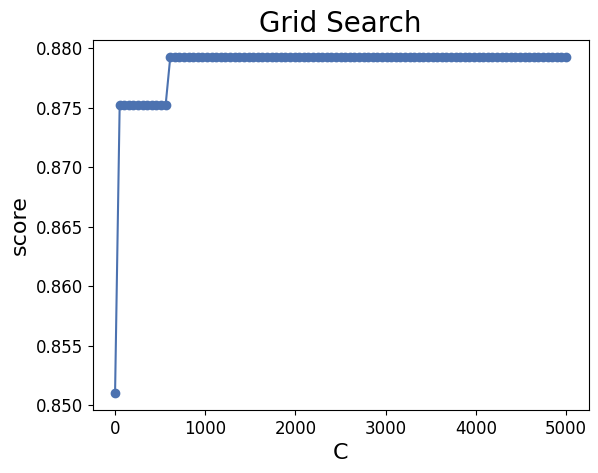

In [14]:
plot_score(log_search, 'C')
print("best param", log_search.best_params_)
print("best score", log_search.best_score_)

sgd_pred_training = sgd_clf.predict(X_train_tr)
sgd_training_f1 = (f1_score(y_train_tr, sgd_pred_training, average="weighted"))
print(sgd_training_f1)

### SVM Classifier

In [15]:
from sklearn.svm import SVC
svc_param_grid = {'C': np.linspace(-5, 500, 100)}

svc_clf = SVC(random_state=5)
svc_clf.fit(X_train_tr, y_train_tr)

svc_search = GridSearchCV(svc_clf, svc_param_grid, cv=5, scoring='accuracy')
svc_search.fit(X_train_tr, y_train_tr)


GridSearchCV(cv=5, estimator=SVC(random_state=5),
             param_grid={'C': array([-5.00000000e+00,  1.01010101e-01,  5.20202020e+00,  1.03030303e+01,
        1.54040404e+01,  2.05050505e+01,  2.56060606e+01,  3.07070707e+01,
        3.58080808e+01,  4.09090909e+01,  4.60101010e+01,  5.11111111e+01,
        5.62121212e+01,  6.13131313e+01,  6.64141414e+01,  7.15151515e+01,
        7.66161616e+01,  8.17171717e+01,  8.681818...
        3.82676768e+02,  3.87777778e+02,  3.92878788e+02,  3.97979798e+02,
        4.03080808e+02,  4.08181818e+02,  4.13282828e+02,  4.18383838e+02,
        4.23484848e+02,  4.28585859e+02,  4.33686869e+02,  4.38787879e+02,
        4.43888889e+02,  4.48989899e+02,  4.54090909e+02,  4.59191919e+02,
        4.64292929e+02,  4.69393939e+02,  4.74494949e+02,  4.79595960e+02,
        4.84696970e+02,  4.89797980e+02,  4.94898990e+02,  5.00000000e+02])},
             scoring='accuracy')

best param {'C': np.float64(5.202020202020202)}
best score 0.8267755102040816
0.875077783739781


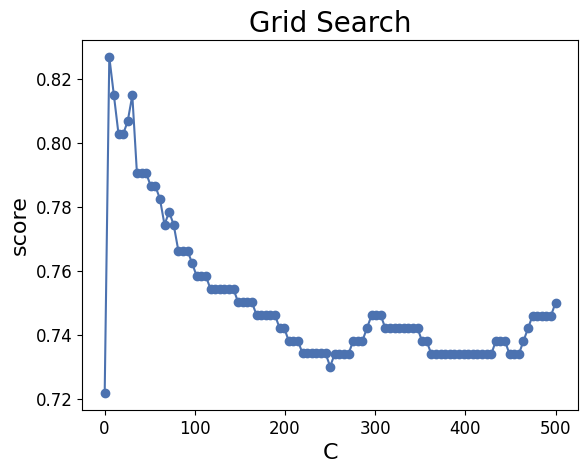

In [16]:
plot_score(svc_search, 'C')
print("best param", svc_search.best_params_)
print("best score", svc_search.best_score_)

svc_pred_training = svc_clf.predict(X_train_tr)
svc_training_f1 = (f1_score(y_train_tr, svc_pred_training, average="weighted"))
print(svc_training_f1)

### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_param_grid = {'n_estimators': np.linspace(1, 200, dtype = int, num = 50)}

forest_clf = RandomForestClassifier(n_estimators=10, random_state=5)
forest_clf.fit(X_train_tr, y_train_tr)

forest_search = GridSearchCV(forest_clf, forest_param_grid, cv=5, scoring='accuracy')
forest_search.fit(X_train_tr, y_train_tr)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=5),
             param_grid={'n_estimators': array([  1,   5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,
        53,  57,  61,  65,  70,  74,  78,  82,  86,  90,  94,  98, 102,
       106, 110, 114, 118, 122, 126, 130, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])},
             scoring='accuracy')

best param {'n_estimators': np.int64(25)}
best score 0.8628571428571428
0.9919149946161462


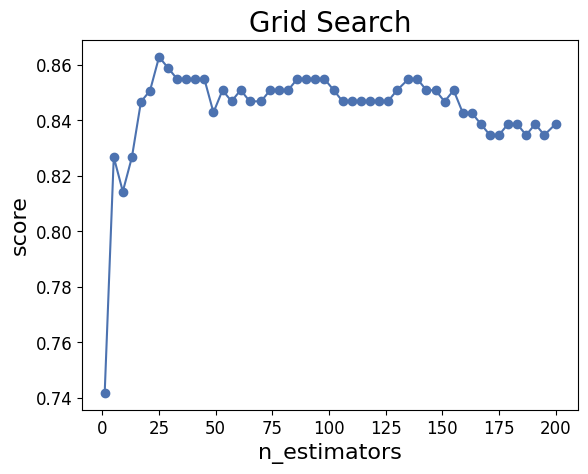

In [18]:
plot_score(forest_search, 'n_estimators')
print("best param", forest_search.best_params_)
print("best score", forest_search.best_score_)

forest_pred_training = forest_clf.predict(X_train_tr)
forest_training_f1 = (f1_score(y_train_tr, forest_pred_training, average="weighted"))
print(forest_training_f1)

## Part 1-4: Evaluation

In this part, write the code to evaluate the three ML classifiers that you trained previously. Summarize your results in the table.

In [19]:
sgd_pred_test = sgd_clf.predict(X_test_sc)
svc_pred_test = svc_clf.predict(X_test_sc)
forest_pred_test = forest_clf.predict(X_test_sc)

sgd_test_f1 = f1_score(y_test, sgd_pred_test, average="weighted")
svc_test_f1 = f1_score(y_test, svc_pred_test, average="weighted")
forest_test_f1 = f1_score(y_test, forest_pred_test, average="weighted")

print("Training: \tsgd", sgd_training_f1, "\tsvc", svc_training_f1, "\tforest", forest_training_f1)
print("Test: \t\tsgd", sgd_test_f1, "\tsvc", svc_test_f1, "\tforest", forest_test_f1)


Training: 	sgd 0.850123315257152 	svc 0.875077783739781 	forest 0.9919149946161462
Test: 		sgd 0.8500531726338177 	svc 0.7975186104218362 	forest 0.7967741935483871


Provide a summary of your results in this table:

| ML algorithm                       | best parameter       | training dataset F1 score | test dataset F1 score |
| ---------------------------------- | -------------------- | ------------------------- |---------------------- |
| Logistic Regression Classifier     |           613.1313131313132           |               0.8501            |             0.850          |
| Support Vector Machine Classifier  |           5.202020202020202           |             0.875              |           0.797            |
| Random Forest Classifier           |              25        |              0.991             |             0.796          |


Provide a brief discussion of your results (1-2 sentences for each classifier):

Here, we can see that the logistic regression model has the most consistent results across the training and test datasets - it does the best at not over- or under-fitting. It does the best on the test data, but the worst on the training data - which is desirable, as we want our models to do better on unknown data.

The SVM model, despite it's mediocre performance on the training dataset, fares just as well as the random forest classifier on the test data. This means that despite it overfitting more than the logistic regression, it overfits less than the random forest.

The random forest model, despite it's amazing results on the training data, underperforms on the test data, indicating a lot of overfitting, despite the addition of the regularization parameters.

# Part 2: Your Dataset
## Part 2-1: Find and Perpare Dataset
In this part of the project you are asked for find your own suitable dataset for training a classifier or a regressor. The requirements for the dataset are:

* The dataset must be available on a public website (e.g., https://www.kaggle.com/datasets, https://archive.ics.uci.edu/ml/, etc.).
* The dataset must be suitable for a classification task (binary classification or multiclass classification) or for a regression task. For classification, class labels need to be part of the dataset already. For regression, a numeric value needs to be available for estimation.
* The dataset must contain more than 100 instances and no more than 10,000-100,000 instances.
* The dataset should have a handful (i.e., not hundreds) of features. Do not use datasets with images or time series.

What is the URL to the dataset of your choice?

Answer: _____https://archive.ics.uci.edu/dataset/10/automobile_____

Provide a brief description of the dataset:

Answer: _____This dataset contains information about a car, such as the engine size, fuel efficiency, or car size to determine the risk factor of the car for insurance purposes. _____

Are you using this dataset for classification or for regression?

Answer: _____This dataset will be used for classification._____

Describe the classification task or regression task:

Answer: _____Based on the given car features, determinine if the risk is -3, -2, -1, 0, 1, 2, or 3._____

To prepare the dataset, please save the necessary data in a .csv file. What is the name of your data file?

Answer: _____automobile_dataset.csv_____

## Part 2-2: Train ML System
Write the code to load the data, prepare the data for your ML task, set up an ML system with an algorithm of your choice, and train the ML system. Note that you may drop features from the dataset if you do not want to use them. During training, explore one parameter to find a good choice for that parameter. Repeat this process for at least one additional ML system that uses a different algorithm.

In [51]:
car_data_original = pd.read_csv("/content/automobile_dataset.csv")

car_data_original.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [67]:
# remove all categorical features
car_data = car_data_original.drop(["normalized_losses", "make", "engine_location", "fuel_type", "aspiration", "drive_wheels", "body_style", "engine_location", "fuel_system", "engine_type"], axis = 1)

# convert some features into numbers
car_data["num_cylinders"] = car_data["num_cylinders"].map({
    "two": 2, "three": 3, "four": 4, "five": 5,
    "six": 6, "eight": 8, "twelve": 12
})
car_data["num_doors"] = car_data["num_doors"].map({
    "two": 2, "four": 4
})
car_data["num_drive_wheels"] = car_data_original["drive_wheels"].map({
    "fwd": 2, "rwd": 2, "4wd": 4
})

# drop rows with missing features
car_data.replace("?", np.nan, inplace=True)
car_data.dropna(inplace=True)

X_2, y_2 = car_data[[
    "num_doors", "wheel_base", "num_drive_wheels",
    "length", "width", "height", "curb_weight", "num_cylinders",
    "engine_size", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
    ]], car_data[[ "symboling"]]

car_data.head()



,symboling,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_drive_wheels
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495,2
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500,2
2,1,2.0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500,2
3,2,4.0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950,2
4,2,4.0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450,4


In [70]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_2_test_sc = grid_pipeline.fit_transform(X_test)

X_2_train_tr = grid_pipeline.fit_transform(X_2_train)
y_2_train_tr = y_2_train  # don't need to transform the classes - theyre just words

In [71]:
sgd_2_param_grid = {'C': np.linspace(-50, 5000, 100)}

sgd_2_clf = LogisticRegression(solver = 'liblinear', random_state=5)
sgd_2_clf.fit(X_2_train_tr, y_2_train_tr)

log_2_search = GridSearchCV(sgd_2_clf, sgd_2_param_grid, cv=5, scoring='accuracy')
log_2_search.fit(X_2_train_tr, y_2_train_tr)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=5, solver='liblinear'),
             param_grid={'C': array([-5.00000000e+01,  1.01010101e+00,  5.20202020e+01,  1.03030303e+02,
        1.54040404e+02,  2.05050505e+02,  2.56060606e+02,  3.07070707e+02,
        3.58080808e+02,  4.09090909e+02,  4.60101010e+02,  5.11111111e+02,
        5.62121212e+02,  6.13131313e+02,  6.64141414e+02,  7.15151515e+02,
        7.66...
        3.82676768e+03,  3.87777778e+03,  3.92878788e+03,  3.97979798e+03,
        4.03080808e+03,  4.08181818e+03,  4.13282828e+03,  4.18383838e+03,
        4.23484848e+03,  4.28585859e+03,  4.33686869e+03,  4.38787879e+03,
        4.43888889e+03,  4.48989899e+03,  4.54090909e+03,  4.59191919e+03,
        4.64292929e+03,  4.69393939e+03,  4.74494949e+03,  4.79595960e+03,
        4.84696970e+03,  4.89797980e+03,  4.94898990e+03,  5.00000000e+03])},
             scoring='accuracy')

best param {'C': np.float64(154.04040404040404)}
best score 0.5978494623655913
0.674373842165549


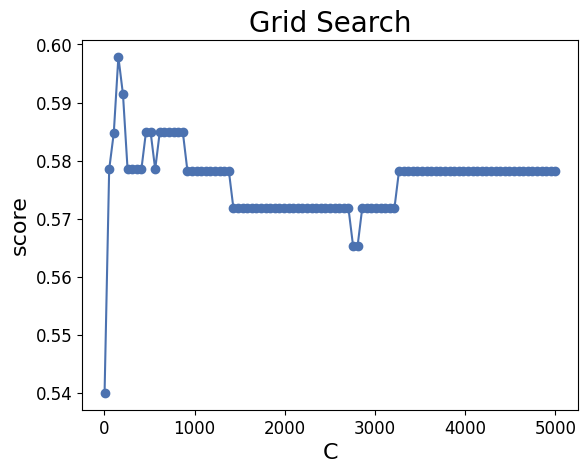

In [72]:
plot_score(log_2_search, 'C')
print("best param", log_2_search.best_params_)
print("best score", log_2_search.best_score_)

sgd_2_pred_training = sgd_2_clf.predict(X_2_train_tr)
sgd_2_training_f1 = (f1_score(y_2_train_tr, sgd_2_pred_training, average="weighted"))
print(sgd_2_training_f1)

Which of the ML systems you tried out will you use for the final evaluation? Why?



## Part 2-3: Evaluate ML System
Write the code to evaluate your ML system.

Write a brief summary about the ML system that you created for your dataset. What worked well and what would you improve in the future?